In [31]:
# The code was removed by Watson Studio for sharing.

load the historical dataset from previous loan application.


print('This project build a classifier to predict whether a loan will be paid off ot not.')

In [32]:
import pylab as pl
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt 

In [34]:
data.head(3)


array([['PAIDOFF'],
       ['PAIDOFF'],
       ['PAIDOFF']], dtype=object)

In [7]:
y = data[ ['loan_status'] ].values
y[0:3]


# let us redefine y as y1. y1 will be in part II; i.e.; best classifier with Decision Tree
y1 = y
from sklearn import preprocessing
le_status = preprocessing.LabelEncoder()
le_status.fit(['PAIDOFF', 'COLLECTION'])
y1 = le_status.transform(y1)
y1[0:5]

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 1, 1, 1, 1])

In [38]:
X = data[ ['Principal', 'terms', 'age', 'Gender'] ].values
X[0:3]

array([[1000, 30, 45, 'male'],
       [1000, 30, 33, 'female'],
       [1000, 15, 27, 'male']], dtype=object)

In [42]:
# converting categorical variables into numerical values 
from sklearn import preprocessing 
le_gender = preprocessing.LabelEncoder()
le_gender.fit(['male', 'female'])
X[:,3] = le_gender.transform(X[:,3])
X[0:2]

array([[1000, 30, 45, 1],
       [1000, 30, 33, 0]], dtype=object)

In [44]:
print('Normalize Data')

# Data standardization give data zero mean and unit variance 
# and it is a good practice for KNN since it is based on disatnce cases. 

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:2]

Normalize Data


array([[ 0.51578458,  0.92071769,  2.33152555,  0.42056004],
       [ 0.51578458,  0.92071769,  0.34170148, -2.37778177]])

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print('Train set :', X_train.shape, y_train.shape )
print('Test set :', X_test.shape, y_test.shape)

Train set : (276, 4) (276, 1)
Test set : (70, 4) (70, 1)


In [50]:
print('Classification => K nearest neighbor KNN')
k = 4
# Train the model
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors =k).fit(X_train,y_train)
neigh
# predict
yhat = neigh.predict(X_test)

Classification => K nearest neighbor KNN


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [52]:
# Accuracy evaluation 
from sklearn import metrics
train_accuracy = metrics.accuracy_score(y_test, yhat)
test_set_accuracy = metrics.accuracy_score(y_test, yhat)
print('Train set Accuracy', train_accuracy)
print('Test set Accuracy', test_set_accuracy)

Train set Accuracy 0.671428571429
Test set Accuracy 0.671428571429


In [63]:
print('Find the best k')

Ks = 10

mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))


for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])


print('best accuracy with', mean_acc.max(), 'with k = ', mean_acc.argmax()+1)


Find the best k
best accuracy with 0.757142857143 with k =  5


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [67]:
print ('PART II => Best classifier with Decision Tree : ')

PART II => Best classifier with Decision Tree : 


In [72]:
from sklearn.tree import DecisionTreeClassifier
X_trainII, X_testII, y_trainII, y_testII = train_test_split(X, y1, test_size = 0.2, random_state = 4)
loanTree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
loanTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [74]:
# train the laon tree
loanTree.fit(X_trainII, y_trainII)
predTree = loanTree.predict(X_testII)

In [77]:
print('Evaluation')

accuracy_DecTree = metrics.accuracy_score(y_testII, predTree)

print('Decision tree accuracy score', accuracy_DecTree)

Evaluation
Decision tree accuracy score 0.785714285714


In [2]:
print('PART III => Best classifier with SVM : ')

PART III => Best classifier with SVM : 


In [20]:
X_svm = data[ ['Principal', 'terms', 'age', 'Gender'] ].values
le_gender = preprocessing.LabelEncoder()
le_gender.fit(['male', 'female'])
X_svm[:,3] = le_gender.transform(X_svm[:,3])
X_svm[0:2]

array([[1000, 30, 45, 1],
       [1000, 30, 33, 0]], dtype=object)

In [25]:
y_svm = y1
y_svm[0:3]

array([1, 1, 1])

In [26]:
from sklearn.model_selection import train_test_split
X_trainIII, X_testIII, y_trainIII, y_testIII = train_test_split(X_svm, y_svm, test_size=0.2, random_state=4)

print('Train set : ', X_trainIII.shape, y_trainIII.shape )
print('Test set : ', X_testIII.shape, y_testIII.shape)


Train set :  (276, 4) (276,)
Test set :  (70, 4) (70,)


In [28]:
from sklearn import svm
clf = svm.SVC(kernel = 'rbf')
clf.fit(X_trainIII, y_trainIII)

yhat = clf.predict(X_testIII)
yhat[0:5]

array([1, 1, 1, 0, 1])

In [33]:
# Evaluations

from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt 

def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Blues) :

    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1) [:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45 )
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i,j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()



In [37]:
cnf_matrix = confusion_matrix(y_testIII, yhat, labels=[1,0])
np.set_printoptions(precision=2)
print (classification_report(y_testIII, yhat))


             precision    recall  f1-score   support

          0       0.00      0.00      0.00        15
          1       0.78      0.95      0.85        55

avg / total       0.61      0.74      0.67        70



Confusion matrix, without normalization
[[52  3]
 [15  0]]


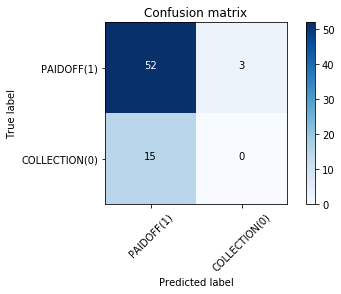

In [38]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF(1)', 'COLLECTION(0)'], normalize=False,title='Confusion matrix')